In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas
import contextily
import seaborn
import sqlite3

In [11]:
def DENUE_SQL(scian, region):
    scian2 = scian + "%"
    sqlcon = sqlite3.connect("denue.db")
    cursor = sqlcon.cursor()
    if region == "*":
        query = "SELECT  latitud, longitud, per_ocu from denue WHERE codigo_act LIKE ?" 
        cursor.execute(query, (scian2,))
    else:
        query = "SELECT  latitud, longitud, per_ocu from denue WHERE codigo_act LIKE ? AND cve_ent == ?" 
        cursor.execute(query, (scian2,region))
    res = cursor.fetchall()
    return res

resQ = DENUE_SQL("3111", "*")
resQ = pandas.DataFrame(resQ, columns = ("latitud","longitud","per_ocu"))
len(resQ)

750

In [12]:
def SustituirPesos(datos):
    diccSust = {'0 a 5 personas': 1, '6 a 10 personas': 6,'11 a 30 personas': 11,'31 a 50 personas':31, '51 a 100 personas':51,'101 a 250 personas':101, '251 y más personas':201}
    return datos.replace({"per_ocu": diccSust})

datosW = SustituirPesos(resQ)
datosW.head()

,latitud,longitud,per_ocu
0,22.055444,-102.265103,11
1,21.907302,-102.308860,6
2,21.908850,-102.294373,1
3,21.835758,-102.279707,6
4,21.964763,-102.283654,11


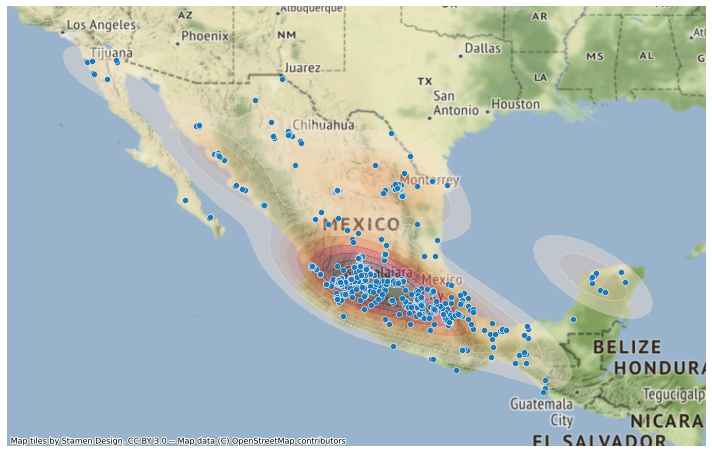

In [34]:
def Graficar(datos, puntos = False, nivelMin = 0.05):
    f, ax = plt.subplots(ncols=1, figsize=(10,10))

    kde = seaborn.kdeplot(
        ax = ax,
        x = datos["longitud"],
        y = datos["latitud"],
        weights = datos["per_ocu"],
        thresh = nivelMin,
        shade = True,
        alpha = 0.4,
        cmap = "rocket_r"
    )
    if puntos:
        seaborn.scatterplot(ax = ax,
            x = datos["longitud"],
            y = datos["latitud"]
        )

    contextily.add_basemap(ax = ax,crs = "WGS84", source = contextily.providers.Stamen.Terrain)
    ax.set_axis_off()
    plt.tight_layout()

    plt.show()

Graficar(datosW, puntos = True)

43834


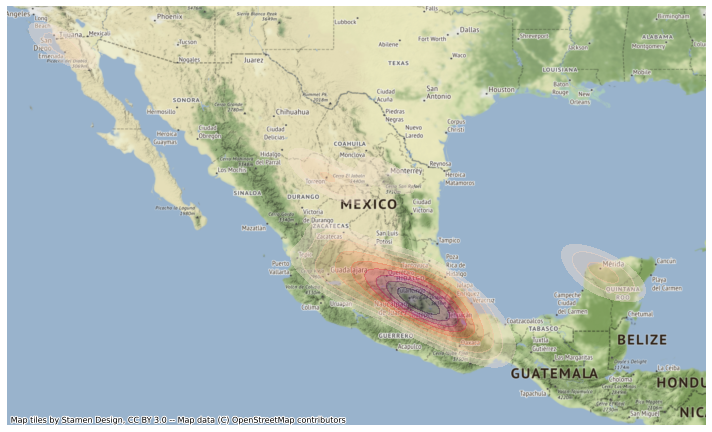

In [60]:
def MapaDENUE(scian, region = "*", puntos = False, nivelMin = 0.05):
    scian = str(scian)
    resQ = DENUE_SQL(scian, region)
    resQ = pandas.DataFrame(resQ, columns = ("latitud","longitud","per_ocu"))
    print(len(resQ))
    datosW = SustituirPesos(resQ)
    Graficar(datosW, puntos = puntos, nivelMin=nivelMin)

MapaDENUE("315", region = "*", puntos = False, nivelMin = 0.2)